deceased  confirmed     ratio
sex    age                               
female 0           0         28  0.000000
       10          0         68  0.000000
       20          0        457  0.000000
       30          0        242  0.000000
       40          0        307  0.000000
       50          3        404  0.007426
       60          1        270  0.003704
       70          7        144  0.048611
       80         15        114  0.131579
       90          2         33  0.060606
       100         0          1  0.000000
male   0           0         38  0.000000
       10          0        110  0.000000
       20          0        440  0.000000
       30          1        281  0.003559
       40          2        210  0.009524
       50          4        263  0.015209
       60         11        212  0.051887
       70         14         88  0.159091
       80         10         56  0.178571
       90          5         16  0.312500

Female Pearson (ratio):  0.5297358738545248
Female Spearman (ratio):  0.6245588123417284
Male Pearson (ratio):  0.8527426308568795
Male Spearman (ratio):  0.9878044218151566


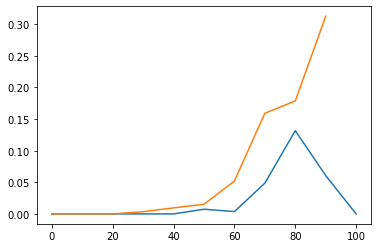

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df1 = pd.read_csv('./data/PatientInfo.csv')

sex_age_df = pd.DataFrame(df1[df1['state'] == 'deceased'].groupby(['sex','age'])['patient_id'].count())
sex_age_df.columns = ['deceased']

#look_at = 'released'
look_at = 'confirmed'

df1['confirmed'] = 1
df1['deceased'] = df1.apply(lambda x: 1 if x['state'] == 'deceased' else 0, axis=1)
df1['released'] = df1.apply(lambda x: 1 if x['state'] == 'released' else 0, axis=1)
sex_age_df = pd.DataFrame(df1.groupby(['sex','age'])[['deceased',look_at]].sum())
sex_age_df = sex_age_df.reset_index()
sex_age_df['age'] = sex_age_df['age'].str.replace('s','').astype(int)
sex_age_df['ratio'] = sex_age_df['deceased']/sex_age_df[look_at]
sex_age_df = sex_age_df.sort_values(by=['sex','age'])
display(sex_age_df.set_index(['sex','age']))

female_df = sex_age_df[sex_age_df['sex']=='female']
male_df = sex_age_df[sex_age_df['sex']=='male']

plt.plot(female_df['age'].to_list(), female_df['ratio'].to_list())
plt.plot(male_df['age'].to_list(), male_df['ratio'].to_list())

#look at this correlation!
print("Female Pearson (ratio): ", female_df.age.corr(female_df.ratio, method="pearson"))
print("Female Spearman (ratio): ", female_df.age.corr(female_df.ratio, method="spearman"))
print("Male Pearson (ratio): ", male_df.age.corr(male_df.ratio, method="pearson"))
print("Male Spearman (ratio): ", male_df.age.corr(male_df.ratio, method="spearman"))